In [37]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
from sklearn import svm
from pandas import ExcelWriter
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot as plt
import seaborn as sbn
import timeit
import numpy as np
import re
import random


def xy_sets(line):
    X=None
    y=None
    indexes = map(int, re.findall('\d+', line))
    aux = False
    for i in indexes:
        if aux is False:
            X = scaled[i, :]
            y = target[i]
            aux = True
            continue
        X = np.vstack((X, scaled[i, :]))
        y = np.hstack((y, target[i]))
        
    return X, y, indexes


In [48]:
# parametrizacao geral
poly_models = np.arange(0.001, 0.011, 0.001)
np.around(poly_models, decimals=3)
dataset_name = ['57', '54']
tech = ['svm', 'knn', 'ann']

# parametrizacao ann
n_hidden = [2, 3]
alpha = [0.001, 0.01, 0.1, 1]
momentum = [0.01, 0.1, 0.5]

# parametrizacao knn
kneighbors = np.arange(1, 11)

# parametrizacao svm
kers = ['linear', 'poly', 'rbf']

fst_part = read_csv('57_'+str(0.001)+'.csv', header=0, index_col=(0,1))
scd_part = read_csv('54_'+str(0.001)+'.csv', header=0, index_col=(0,1))
parts = [fst_part, scd_part]
dataset = concat(parts)
dataset

,,diagnosis,compactness,si,fourier_factor,fd2Dbox,fd1Dbox,fd2Druler,fd1Druler
,name,,,,,,,,
0,C110_95RCROI.jpg,0,0.109347,0.175281,0.093778,1.092550,1.951866,1.015528,1.023530
1,C110_95ROROI.jpg,0,0.130997,0.115619,0.080259,1.099687,1.951866,1.011683,1.023820
2,C145_95LCROI.jpg,0,0.063700,0.168226,0.097080,1.092688,1.951866,1.014141,1.023535
3,C145_95LOROI.jpg,0,0.048224,0.107384,0.612917,1.037874,1.951866,1.008154,1.024217
4,C146_96RCROI.jpg,0,0.298774,0.236240,0.094511,0.978843,1.951866,1.026495,1.023559
5,C146_96ROROI.jpg,0,0.144304,0.208327,0.150838,1.045488,1.951866,1.022107,1.024359
6,C148_97RCROI.jpg,0,0.096802,0.166716,0.082006,1.029809,1.951866,1.017385,1.022956
7,C148_97ROROI.jpg,0,0.118075,0.192005,0.118757,1.070655,1.951866,1.015444,1.023276
8,C155_95RCROI.jpg,0,0.156260,0.221391,0.083945,1.032784,1.951866,1.021459,1.023988


In [42]:
start = timeit.default_timer()

svm_accs = []
knn_accs = []
ann_accs = []

svm_folds_accs = []

i = 0
for m in poly_models:
    m = round(m, 3)
    fst_part = read_csv('57_'+str(m)+'.csv', header=0, index_col=(0,1))
    scd_part = read_csv('54_'+str(m)+'.csv', header=0, index_col=(0,1))
    parts = [fst_part, scd_part]
    dataset = concat(parts)
    for t in tech:
        if t == 'svm':
            max_acc = 0
            max_folds_acc = np.zeros(20)
            for ker in kers:
                # pega apenas os valores contidos no dataset
                values = dataset.values
                
                # divide o dataset em data(input) e target(output)
                data = values[:, 1:] 
                target = values[:, 0]
                
                # normaliza as features
                scaled = normalize(data[:, :3], norm='max', axis=0)
                scaled = np.concatenate((scaled, data[:, :4]), axis = 1)
                
                scores = np.zeros(20)
                col = np.array([])
                cont = 0
                sns = 0  # true negatives rate
                spf = 0  # true positives rate
                y_test_full = np.array([])
                y_cont_full = np.array([])
                
                file = open('combined_kf.txt', 'r')
                while cont < 20:

                    train_line = file.readline()
                    test_line = file.readline()

                    X_train, y_train, train_indexes = xy_sets(train_line)
                    X_test, y_test, test_indexes = xy_sets(test_line)
                    
                    #create the SVM
                    clf = svm.SVC(gamma='auto', kernel=ker)
                    clf.fit(X_train, y_train)
                    
                    y_pred = clf.predict(X_test)
                    scores[cont] = accuracy_score(y_test, y_pred)
                    
                    y_test_full = np.hstack((y_test_full, y_test))
                    y_cont_full = np.hstack((y_cont_full, y_pred))
                
                    cont += 1
                
                file.close()
                
                conf_m = confusion_matrix(y_test_full, y_cont_full)
                
                acc = accuracy_score(y_test_full, y_cont_full)
                sns = conf_m[0, 0]/(conf_m[0, 0]+conf_m[1, 0])
                spf = conf_m[1, 1]/(conf_m[1, 1]+conf_m[0, 1])
                
                
                
                # col = np.hstack((col, ker))
                # col = np.hstack((col, scores))
                # col = np.hstack((col, acc))
                # col = np.hstack((col, sns))
                # col = np.hstack((col, spf))
                if acc > max_acc:
                    max_acc = acc
                if np.all(scores > max_folds_acc):
                    max_folds_acc = scores
            
            svm_folds_accs.append(scores)
            svm_accs.append(max_acc)
#         elif t == 'knn':
#             max_acc = 0
#             for k in kneighbors:
#                 # pega apenas os valores contidos no dataset
#                 values = dataset.values

#                 # divide o dataset em data(input) e target(output)
#                 data = values[:, 1:] 
#                 target = values[:, 0]

#                 # normaliza as features
#                 scaled = normalize(data[:, :3], norm='max', axis=0)
#                 scaled = np.concatenate((scaled, data[:, :4]), axis = 1)

#                 scores = np.zeros(20)
#                 col = np.array([])
#                 cont = 0
#                 sns = 0  # true negatives rate
#                 spf = 0  # true positives rate
#                 y_test_full = np.array([])
#                 y_cont_full = np.array([])

#                 file = open('combined_kf.txt', 'r')
#                 while cont < 20:

#                     train_line = file.readline()
#                     test_line = file.readline()

#                     X_train, y_train, train_indexes = xy_sets(train_line)
#                     X_test, y_test, test_indexes = xy_sets(test_line)

#                     classifier = KNeighborsClassifier(n_neighbors=k)  # classifier 
#                     classifier.fit(X_train, y_train)
#                     scores[cont] = classifier.score(X_test, y_test)
#                     y_pred = classifier.predict(X_test)

#                     y_test_full = np.hstack((y_test_full, y_test))
#                     y_cont_full = np.hstack((y_cont_full, y_pred))

#                     cont += 1

#                 file.close()
                
#                 conf_m = confusion_matrix(y_test_full, y_cont_full)
                
#                 acc = accuracy_score(y_test_full, y_cont_full)
#                 sns = conf_m[0, 0]/(conf_m[0, 0]+conf_m[1, 0])
#                 spf = conf_m[1, 1]/(conf_m[1, 1]+conf_m[0, 1])
                
#                 # col = np.hstack((col, k))
#                 col = np.hstack((col, scores))
#                 # col = np.hstack((col, acc))
#                 # col = np.hstack((col, sns))
#                 # col = np.hstack((col, spf))
#                 if acc > max_acc:
#                     max_acc = acc
                    
#             knn_accs.append(max_acc)

#         elif t == 'ann':
#             max_acc = 0
#             for n in n_hidden:
#                 for a in alpha:
#                     for mo in momentum:
#                         # pega apenas os valores contidos no dataset
#                         values = dataset.values

#                         # split data set into data(input) and target(output)
#                         data = values[:, 1:] 
#                         target = values[:, 0]

#                         # normalize features
#                         scaled = normalize(data[:, :3], norm='max', axis=0)
#                         scaled = np.concatenate((scaled, data[:, :4]), axis = 1)

#                         scores = np.zeros(20)
#                         col = np.array([])
#                         cont = 0
#                         sensitivity = 0  # true positives rate
#                         specificity = 0  # true negatives rate
#                         y_test_full = np.array([])
#                         y_cont_full = np.array([])

#                         file = open('combined_kf.txt', 'r')
#                         while cont < 20:

#                             train_line = file.readline()
#                             test_line = file.readline()

#                             X_train, y_train, train_indexes = xy_sets(train_line)
#                             X_test, y_test, test_indexes = xy_sets(test_line)

#                             classifier = MLPClassifier(hidden_layer_sizes=(n,), solver='lbfgs', 
#                                                         alpha=a, random_state=11, verbose=False, momentum=mo)  # classifier 
#                             classifier.fit(X_train, y_train)
#                             scores[cont] = classifier.score(X_test, y_test)
#                             y_pred = classifier.predict(X_test)

#                             y_test_full = np.hstack((y_test_full, y_test))
#                             y_cont_full = np.hstack((y_cont_full, y_pred))

#                             cont += 1
                        
#                         file.close()
                        
#                         conf_m = confusion_matrix(y_test_full, y_cont_full)
                
#                         acc = accuracy_score(y_test_full, y_cont_full)
#                         sns = conf_m[0, 0]/(conf_m[0, 0]+conf_m[1, 0])
#                         spf = conf_m[1, 1]/(conf_m[1, 1]+conf_m[0, 1])

#                         col = np.hstack((col, a))
#                         col = np.hstack((col, mo))
#                         col = np.hstack((col, m))
#                         # col = np.hstack((col, scores))
#                         col = np.hstack((col, acc))
#                         col = np.hstack((col, sns))
#                         col = np.hstack((col, spf))
#                         if acc > max_acc:
#                             max_acc = acc
                    
#             ann_accs.append(max_acc)
        else:
            print('qq ta conteceno? nem deveria chegar aqui')
        i += 1
stop = timeit.default_timer()
print('Time: ', stop - start) 

qq ta conteceno? nem deveria chegar aqui
qq ta conteceno? nem deveria chegar aqui
qq ta conteceno? nem deveria chegar aqui
qq ta conteceno? nem deveria chegar aqui
qq ta conteceno? nem deveria chegar aqui
qq ta conteceno? nem deveria chegar aqui
qq ta conteceno? nem deveria chegar aqui
qq ta conteceno? nem deveria chegar aqui
qq ta conteceno? nem deveria chegar aqui
qq ta conteceno? nem deveria chegar aqui
qq ta conteceno? nem deveria chegar aqui
qq ta conteceno? nem deveria chegar aqui
qq ta conteceno? nem deveria chegar aqui
qq ta conteceno? nem deveria chegar aqui
qq ta conteceno? nem deveria chegar aqui
qq ta conteceno? nem deveria chegar aqui
qq ta conteceno? nem deveria chegar aqui
qq ta conteceno? nem deveria chegar aqui
qq ta conteceno? nem deveria chegar aqui
qq ta conteceno? nem deveria chegar aqui
Time:  4.141839081999933


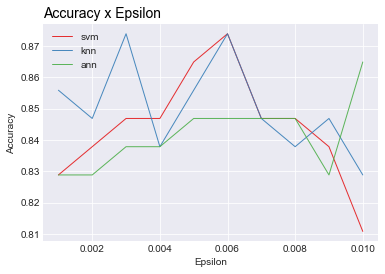

In [29]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

num = 0
plt.plot(poly_models, svm_accs, marker='', color=palette(num), linewidth=1, alpha=0.9, label='svm')
num = 1
plt.plot(poly_models, knn_accs, marker='', color=palette(num), linewidth=1, alpha=0.9, label='knn')
num = 2
plt.plot(poly_models, ann_accs, marker='', color=palette(num), linewidth=1, alpha=0.9, label='ann')

# Add legend
plt.legend(loc=2, ncol=1)

plt.title('Accuracy x Epsilon', loc='left', fontsize=14, fontweight=0, color='black')
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")

plt.show()

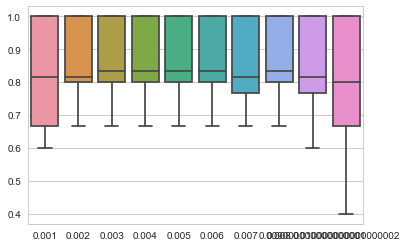

In [49]:
sbn.set(style='whitegrid')
sbn.boxplot(y=svm_folds_accs, x=poly_models)